# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [40]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def desc_stats(some_list):
  """
  Calculates mean, variance for any sized list

  Arguments: some_list(list)
  Retrns: mean(float), variance(float)
  """
  mean = sum(some_list)/len(some_list)
  distances = [num - mean for num in some_list]
  squared_distances = list(map(lambda x: x**2, distances))
  varience=sum(squared_distances)/len(some_list)

  return mean, varience

In [41]:
mean, variance = desc_stats(sales)
print(f'mean = {mean}\nvariance = {variance}')

mean = 3052.714285714286
variance = 183761.06122448976


In [42]:
import math 
std = math.sqrt(variance)
print(f'std = {std}')

std = 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [20]:
# define number of sales and customers
import pandas as pd
import numpy as np

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93]

# create a data frame for easier use
df = pd.DataFrame({'sales':sales, 'customers':customers})
df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [30]:
pd.DataFrame(np.cov(sales, customers), columns=['sales', 'customers'])

,sales,customers
0,214387.904762,7604.357143
1,7604.357143,290.952381


In [26]:
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [52]:
sales_std = math.sqrt(desc_stats(sales)[1])
customers_std = math.sqrt(desc_stats(customers)[1])

denom = sales_std*customers_std
denom

6769.620265121536

In [54]:
denom
np.std(df['customers'])*np.std(df['sales'])

6769.620265121536

In [55]:
covarience = df['sales'].cov(df['customers'])

In [56]:
covarience/denom

1.123306307450706

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [67]:
data_url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

df_titanic = pd.read_csv(data_url)
df_titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [68]:
# variance-covariance matrix
df_titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [69]:
# correlation matrix 
df_titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

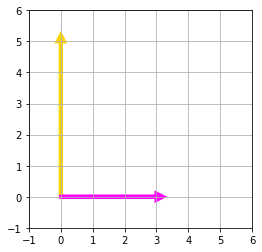

In [76]:
# synonym for orthogonal is perpendicular 
import matplotlib.pyplot as plt

a  = [0, 5]
b = [3, 0]

fig, ax = plt.subplots(figsize=[4, 4])
ax.grid()
plt.xlim(-1, 6)
plt.ylim(-1, 6)

for vect, color in [(a,'gold'), (b, 'magenta')]:
  plt.arrow(0, 0,
            vect[0], vect[1],
            head_width=.2, 
            head_length=.2, 
            linewidth=4, 
            color=color)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [81]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

Two vectors are not orthogonal because their dot product is not equal zero

In [82]:
np.dot(a, b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [87]:
c = np.array([2, -15, 6, 20])

# norm c 
c_norm = np.linalg.norm(c)
print(f'Norm c is {c_norm}')

# c dot c 
c_dot_c = np.dot(c, c)
print(f'c dot c is {c_dot_c}')

# c transpose c 
c_transpose = c.T
print(f'c transpose c is {c_transpose*c}')

Norm c is 25.787593916455254
c dot c is 665
c transpose c is [  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1\end{bmatrix}\qquad
e = 2\begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} 
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [89]:
f = np.array([4, 12, 11, 9, 2])
f_norm = np.linalg.norm(f)
f_unit = f/f_norm
f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

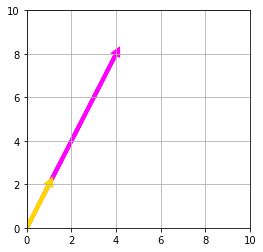

In [95]:
g = [1, 2]
h = [4, 8]

fig, ax = plt.subplots(figsize=[4, 4])
ax.grid()
plt.xlim(0, 10)
plt.ylim(0, 10)

for vect, color in [(h, 'magenta'), (g,'gold')]:
  plt.arrow(0, 0,
            vect[0], vect[1],
            head_width=.2, 
            head_length=.2, 
            linewidth=4, 
            color=color)
plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

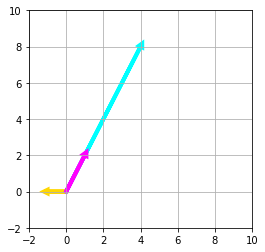

In [99]:
l = [1, 2,3]
m=[-1, 0, 7]
n=[4, 8, 2] 

fig, ax = plt.subplots(figsize=[4, 4])
ax.grid()
plt.xlim(-2, 10)
plt.ylim(-2, 10)

for vect, color in [(m,'gold'), (n,'cyan'), (l, 'magenta')]:
  plt.arrow(0, 0,
            vect[0], vect[1],
            head_width=.2, 
            head_length=.2, 
            linewidth=4, 
            color=color)
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



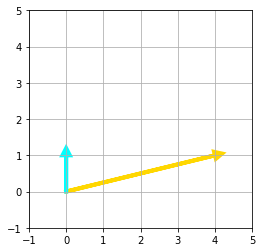

In [101]:
n = [0, 1]
m = [4, 1]

fig, ax = plt.subplots(figsize=[4, 4])
ax.grid()
plt.xlim(-1, 5)
plt.ylim(-1, 5)

for vect, color in [(m,'gold'), (n,'cyan')]:
  plt.arrow(0, 0,
            vect[0], vect[1],
            head_width=.2, 
            head_length=.2, 
            linewidth=4, 
            color=color)
plt.show()

## 6.2 What does it mean to form a basis?

A subset of vectors form a basis of a vector space if they are linearly independent and span that vector space 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [106]:
P = np.array([[1, 2,3], [-1, 0, 7], [4, 8, 2]])
rank_P = np.linalg.matrix_rank(P)
print(f'Rank of matrix P is {rank_P}')

Rank of matrix P is 3


## 7.2 What does the rank of a matrix tell us?

Rank is the dimension of the space spanned by matrice's columns

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [107]:
v = [1, 3]
w = [-1, 2]

v_dot_v = np.dot(v, v)
w_dot_v = np.dot(w, v)

fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction, v)

print(projection)

[0.5 1.5]


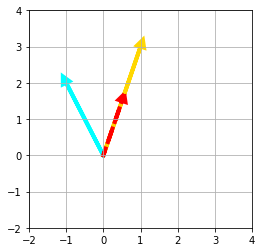

In [111]:
fig, ax = plt.subplots(figsize=[4, 4])
ax.grid()
plt.xlim(-2, 4)
plt.ylim(-2, 4)

for vect, color in [(v,'gold'), (w,'cyan')]:
  plt.arrow(0, 0,
            vect[0], vect[1],
            head_width=.2, 
            head_length=.2, 
            linewidth=4, 
            color=color)

plt.arrow(0, 0,
          projection[0], 
          projection[1],
          head_width=.2, 
          head_length=.2, 
          linewidth=4, 
          linestyle='dashed',
          color='red')
  
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [ ]:
def projections(x, y, data):
  """
  Calculates projection of each vector 
  in the data frame onto x=y line

  Arguments: x-column, y-column, data
  Returnes: dataframe
  """
  df = pd.DataFrame({'x':list(data[x]), 'y':list(data[y])})
  line = [1000, 1000]
  projections = []
  for row in range(len(df)):
    vect = list(df.iloc[row])
    vect_dot_vect = np.dot(vect, vect)
    vect_dot_line = np.dot(vect, line)
    fraction = vect_dot_line/vect_dot_vect
    projection = np.multiply(fraction, vect)
    projections.append(list(projection))
  return pd.DataFrame(projections, columns=['x', 'y'])

projections(x='x', y='y', data=df)

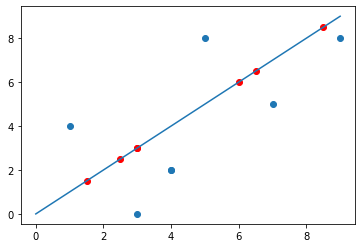

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

x1, y1 = [0, 9], [0, 9]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)



# define function 
def projections(x, y, data):
  """
  Calculates projection of each vector 
  in the data frame onto x=y line

  Arguments: x-column, y-column, data
  Returnes: dataframe
  """
  df = pd.DataFrame({'x':list(data[x]), 'y':list(data[y])})
  line = [9, 9]
  line_dot_line = np.dot(line, line)
  projections = []
  for row in range(len(df)):
    vect = list(df.iloc[row])
    vect_dot_line = np.dot(vect, line)
    fraction = vect_dot_line/line_dot_line
    projection = np.multiply(fraction, line)
    projections.append(list(projection))
  projections
  return pd.DataFrame(projections, columns=['x', 'y'])

# get projections 
proj_df = projections(x='x', y='y', data=df)

# plot projections 
for row in range(len(proj_df)):
  projection = proj_df.iloc[row]
  plt.scatter(projection.x, projection.y, color='red')

plt.scatter(df.x, df.y)
plt.plot(x1, y1)

plt.show()

In [166]:
def projections(x, y, data):
  """
  Calculates projection of each vector 
  in the data frame onto x=y line

  Arguments: x-column, y-column, data
  Returnes: dataframe
  """
  df = pd.DataFrame({'x':list(data[x]), 'y':list(data[y])})
  line = [9, 9]
  projections = []
  for row in range(len(df)):
    vect = list(df.iloc[row])
    vect_dot_vect = np.dot(vect, vect)
    vect_dot_line = np.dot(line, vect)
    fraction = vect_dot_line/vect_dot_vect
    projection = np.multiply(fraction, vect)
    projections.append(list(projection))
  return projections

pd.DataFrame(projections, columns=['x', 'y'])
projections(x='x', y='y', data=df)

[[2.6470588235294117, 10.588235294117647],
 [10.8, 5.4],
 [10.216216216216216, 7.297297297297297],
 [9.0, 0.0],
 [9.496551724137932, 8.441379310344828],
 [10.8, 5.4],
 [6.573033707865169, 10.51685393258427]]

In [183]:
line = [9, 9]
line_dot_line = np.dot(line, line)
projections = []
for row in range(len(df)):

  vect = list(df.iloc[row])
  vect_dot_line = np.dot(vect, line)
  fraction = vect_dot_line/line_dot_line
  projection = np.multiply(fraction, line)
  projections.append(list(projection))
projections

[[2.5, 2.5],
 [3.0, 3.0],
 [6.0, 6.0],
 [1.5, 1.5],
 [8.5, 8.5],
 [3.0, 3.0],
 [6.5, 6.5]]

In [179]:
v = df.iloc[0]
np.dot(v, v)

17